# Ecommerce Customer Churn Analysis and Prediction

| Column                       | Descriptions                                                    |
| --------------------------- | ---------------------------------------------------------- |
| CustomerID                  | Unique customer ID                                            |
| Churn                       | Churn Flag                                                    |
| Tenure                      | Tenure of customer in organization (Durasi Berlangganan)                            |
| PreferredLoginDevice        | Preferred login device of customer                            |
| CityTier                    | City tier                                                     |
| WarehouseToHome             | Distance in between warehouse to home of customer             |
| PreferredPaymentMode        | Preferred payment method of customer                          |
| Gender                      | Gender of customer                                            |
| HourSpendOnApp              | Number of hours spend on mobile application or website        |
| NumberOfDeviceRegistered    | Total number of deceives is registered on particular customer |
| PreferedOrderCat            | Preferred order category of customer in last month            |
| SatisfactionScore           | Satisfactory score of customer on service                     |
| MaritalStatus               | Marital status of customer                                    |
| NumberOfAddress             | Total number of added added on particular customer            |
| Complain                    | Any complaint has been raised in last month                   |
| OrderAmountHikeFromlastYear | Percentage increases in order from last year                  |
| CouponUsed                  | Total number of coupon has been used in last month            |
| OrderCount                  | Total number of orders has been places in last month          |
| DaySinceLastOrder           | Day Since last order by customer                              |
| CashbackAmount              | Average cashback in last month                                |

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

In [177]:
df = pd.read_excel('E Commerce Dataset.xlsx')

In [178]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2932,52933,0,15.0,Mobile Phone,1,26.0,Debit Card,Male,3.0,4,Laptop & Accessory,5,Married,4,0,17.0,2.0,2.0,1.0,155.72
1250,51251,1,0.0,Computer,1,NaN,Debit Card,Female,2.0,1,Mobile,3,Single,4,1,14.0,0.0,1.0,3.0,124.32
4911,54912,0,24.0,Computer,3,7.0,Debit Card,Female,4.0,4,Laptop & Accessory,3,Married,2,0,13.0,1.0,2.0,14.0,188.47
4072,54073,0,5.0,Computer,1,10.0,Credit Card,Male,3.0,4,Mobile Phone,5,Married,3,1,14.0,1.0,3.0,4.0,155.65
3631,53632,0,4.0,Mobile Phone,1,13.0,COD,Female,3.0,5,Laptop & Accessory,2,Divorced,2,0,13.0,6.0,7.0,8.0,171.27


## EXPLORATORY DATA ANALYSIS

### DESCRIPTIVE ANALYSIS

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Tipe data pada kolom Churn, CityTier, Complain seharusnya string

In [180]:
#drop kolom CustomerID karena unik di masing2 row, jadi tidak berguna untuk model
df.drop(columns='CustomerID', inplace=True)

#Convert kolom yang seharusnya kategorikal
for i in ['Churn','CityTier','Complain']:
        df[i] = df[i].astype(str)

In [181]:
#Split data numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [182]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00


In [183]:
df[kat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [184]:
for i in kat:
        print(df[i].value_counts())
        print('')

0    4682
1     948
Name: Churn, dtype: int64

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Male      3384
Female    2246
Name: Gender, dtype: int64

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

0    4026
1    1604
Name: Complain, dtype: int64



Ada beberapa value yg ambigu :
- kolom PreferredLoginDevice = Mobile Phone & Phone
- kolom PreferredPaymentMode = Cash on Delivery & COD , Credit Card & CC
- kolom PreferedOrderCat = Mobile Phone & Mobile

Di step preprocessing akan di replace value dg salah satu value

#### Missing Values

In [185]:
print(round(df.isna().sum()/df.shape[0]*100,2))
print("\nTotal : ",round(df.isna().any(axis=1).sum()/df.shape[0]*100,2),'%')

Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

Total :  32.97 %


<AxesSubplot:>

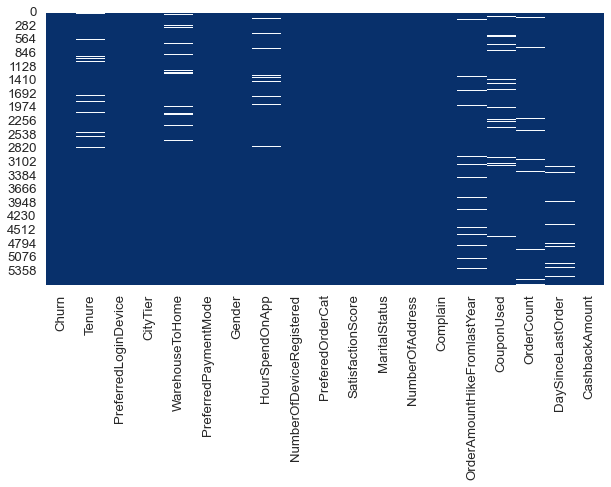

In [186]:
plt.figure(figsize=(10,5))
sns.heatmap(~df.isna(), cmap='Blues', cbar=False)

Karena data yg kosong sangat banyak yakni 33% maka nanti akan di impute menggunakan median (numeric) dan most frequent (kategorik)

#### Duplicate Data

In [187]:
df.duplicated().sum()

556

Terdapat sebanyak 556 baris yang duplikat, akan dihapus pada saat preprocessing data

#### Deteksi Outliers

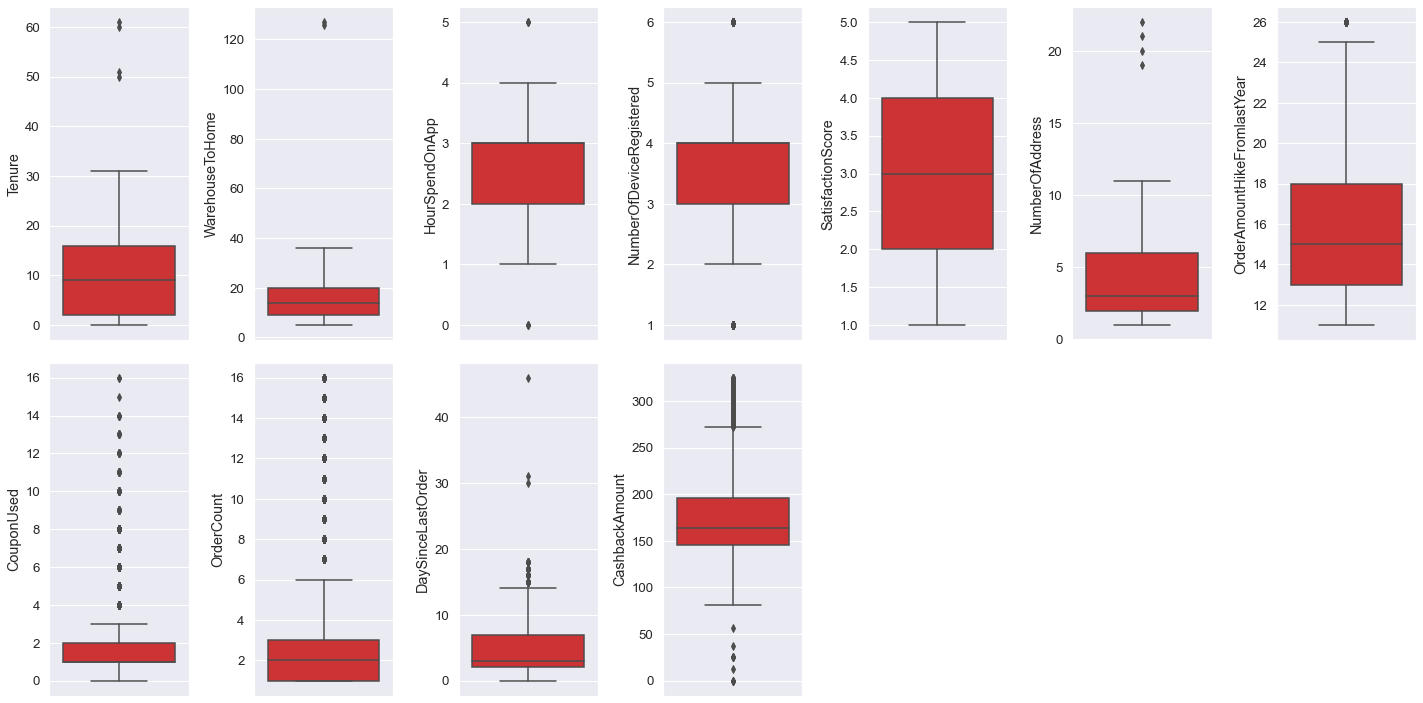

In [188]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(2,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

In [189]:
for j in num:
        q1 = df[j].quantile(0.25)
        q3 = df[j].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (iqr *1.5)
        highlimit = q3 + (iqr*1.5)
        print('Outlier dari kolom',"\""+j+"\"",'sebanyak ', df[(df[j]<lowlimit) | (df[j]>highlimit)].shape[0])

Outlier dari kolom "Tenure" sebanyak  4
Outlier dari kolom "WarehouseToHome" sebanyak  2
Outlier dari kolom "HourSpendOnApp" sebanyak  6
Outlier dari kolom "NumberOfDeviceRegistered" sebanyak  397
Outlier dari kolom "SatisfactionScore" sebanyak  0
Outlier dari kolom "NumberOfAddress" sebanyak  4
Outlier dari kolom "OrderAmountHikeFromlastYear" sebanyak  33
Outlier dari kolom "CouponUsed" sebanyak  629
Outlier dari kolom "OrderCount" sebanyak  703
Outlier dari kolom "DaySinceLastOrder" sebanyak  62
Outlier dari kolom "CashbackAmount" sebanyak  438


Jumlah outlier pada dataset cukup banyak, nantinya outlier yang < low limit akan di impute dengan low limit, sedangkan nilai yang > high limit akan di impute dengan high limit

### UNIVARIATE ANALYSIS

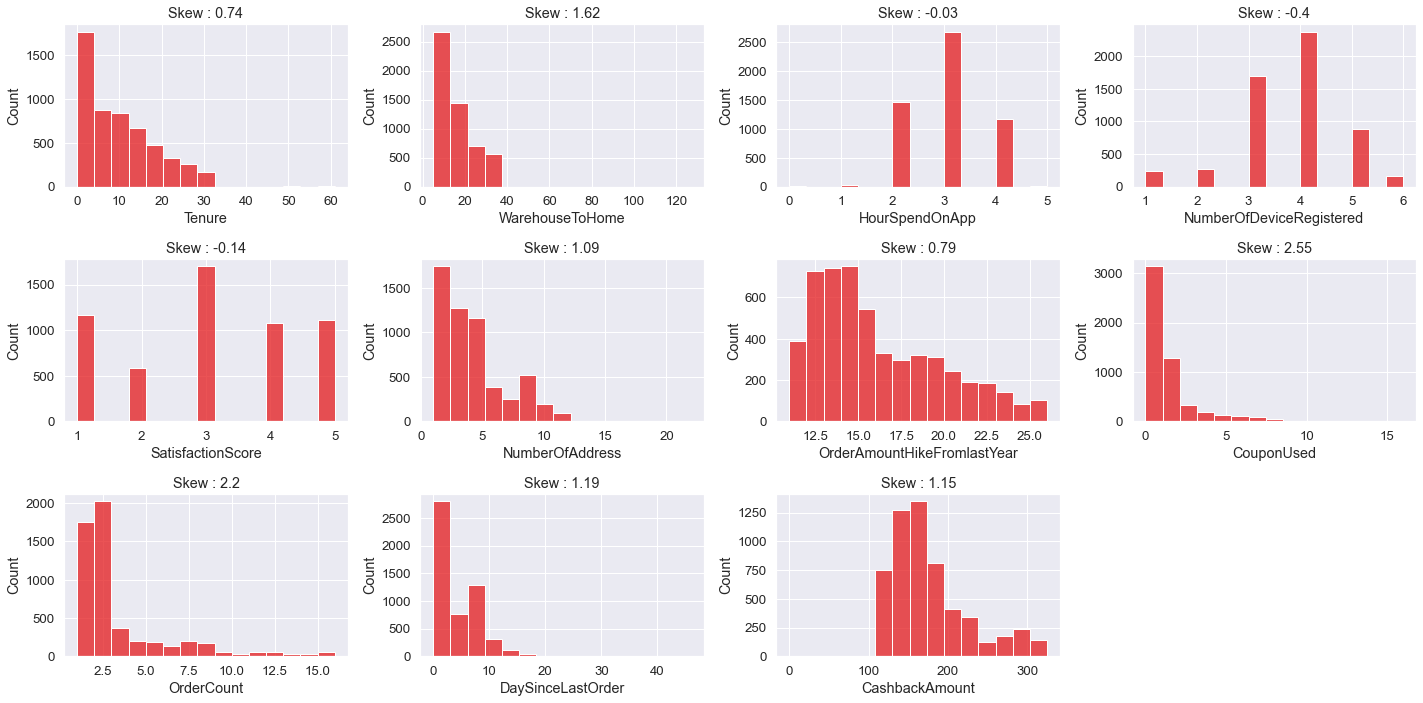

In [190]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(3,4,i+1)
        sns.histplot(x=df[j], bins=15)
        plt.title("Skew : "+ str(round(df[j].skew(),2)))
        plt.tight_layout()

- Pada kolom `Tenure` terlihat bahwa customer terbanyak adalah pelanggan baru
- Pada kolom `warehouseToHome` lebih banyak customer yang rumahnya dekat dengan warehouse kita
- Kebanyakan Customer registrasi di e Commerce kita dengan `device` lebih dari 1 
- Data `kepuasan pelanggan` paling banyak di `bintang 3`, artinya customer masih belum terlalu puas dengan eCommerce kita, apalagi bintang 1 distribusinya masih cukup tinggi
- Banyak customer yang masih tidak menggunakan `coupon`
- Banyak customer yang hanya `repeat order` sebanyak 2-3 kali
- `Persentase kenaikan order` dari tahun lalu masih cukup banyak yang rendah di angka 12%-15%

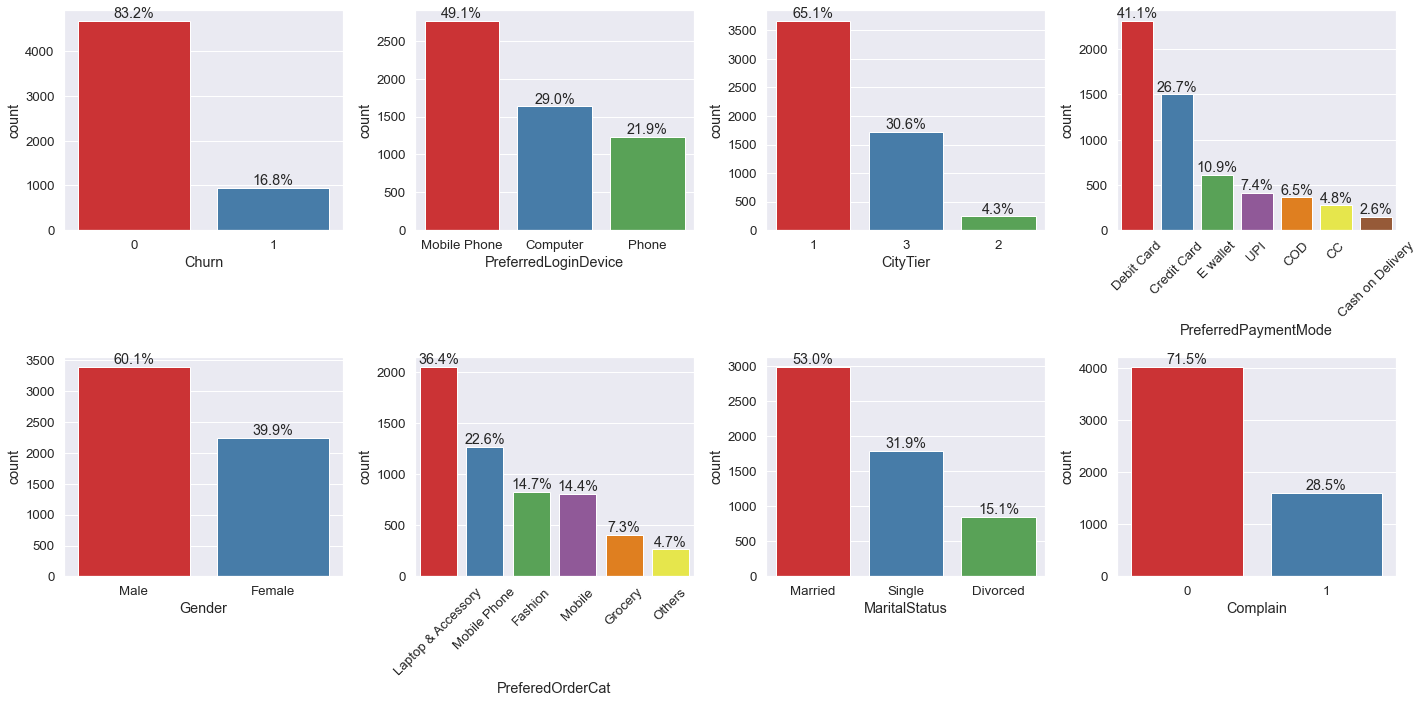

In [191]:
plt.figure(figsize=(20,10))
for i,j in enumerate(kat):
        plt.subplot(2,4,i+1)

        #sort from highest to lowest
        ax = sns.countplot(x=df[j], order=df[j].value_counts(ascending=False).index)
        
        #generate label (%)
        persen = round(df[j].value_counts(normalize=True, ascending=False),3).values*100
        label = [f'{p:.1f}%'  for p in persen]
        ax.bar_label(container=ax.containers[0], labels=label)
        
        # rotate label
        if j in ['PreferredPaymentMode','PreferedOrderCat']:
                plt.xticks(rotation=45)
        
        plt.tight_layout()

- `Churn rate` di ecommerce kita masih bisa diturunkan lagi
- Kebanyakan customer menggunakan `mobile phone` untuk login ke ecommerce kita
- Banyak customer berasar dari `city tier` 1
- Banyak customer lebih suka melakukan pembayaran dengan `debit card`
- Kategori paling banyak dibeli adalah `Laptop & Accessory`
- Setengah populasi customer berstatus `married`

### BIVARIATE ANALYSIS

#### Numeric VS Target

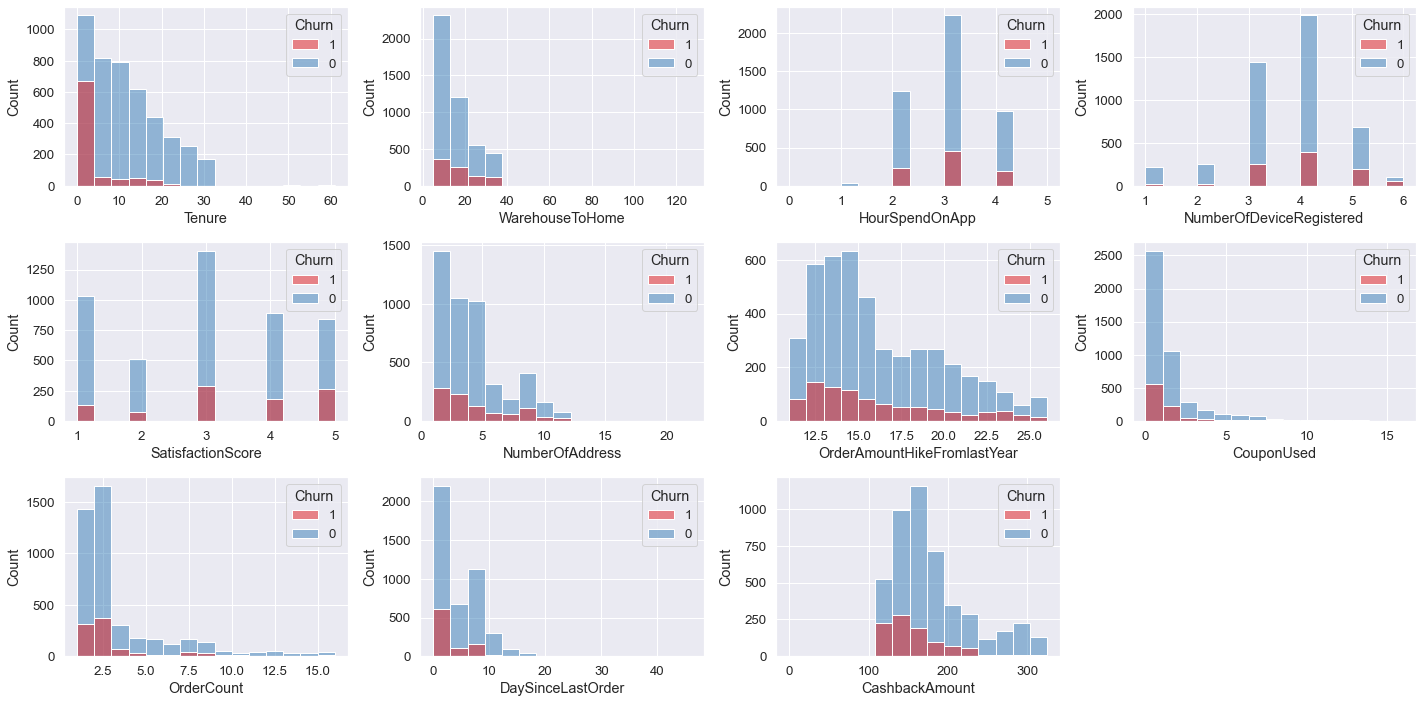

In [192]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(3,4,i+1)
        sns.histplot(x=j,  hue='Churn', data=df, bins=15)
        plt.tight_layout()

- Kebanyakan customer churn dengan `tenure` 0 (Pelanggan Baru)
- Customer yg churn kebanyak `orderCount` nya 1-3

#### Kategorik VS Target

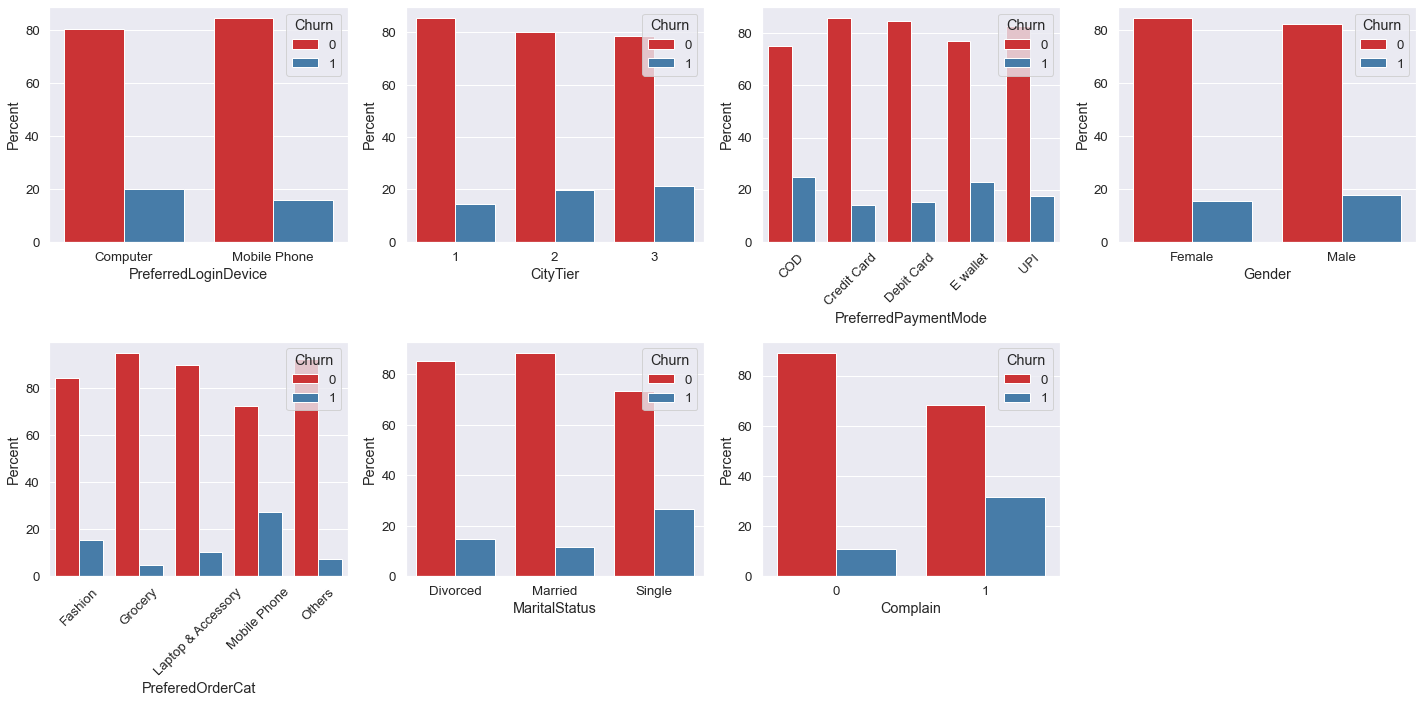

In [222]:
#Handle Duplikasi Value
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferedOrderCat'].replace('Mobile','Mobile Phone', inplace=True)


plt.figure(figsize=(20,10))
kat=kat.drop('Churn', errors='ignore')
for i,j in enumerate(kat):
        plt.subplot(2,4,i+1)

        #sudah di normalize (bentuk persentase)
        normal = df.groupby(j)['Churn'].value_counts(normalize=True).multiply(100).rename('Percent').reset_index()
        sns.barplot(data=normal, x=j, y='Percent', hue='Churn')
        
        # rotate label
        if j in ['PreferredPaymentMode','PreferedOrderCat']:
                plt.xticks(rotation=45)
        
        plt.tight_layout()


- Customer yang membeli produk kategori `Mobile Phone` cenderung lebih banyak churn
- Customer yang berstatus `single` cenderung lebih banyak churn
- Customer yang `complain` cenderung akan churn

### MULTIVARIATE ANALYSIS

<AxesSubplot:>

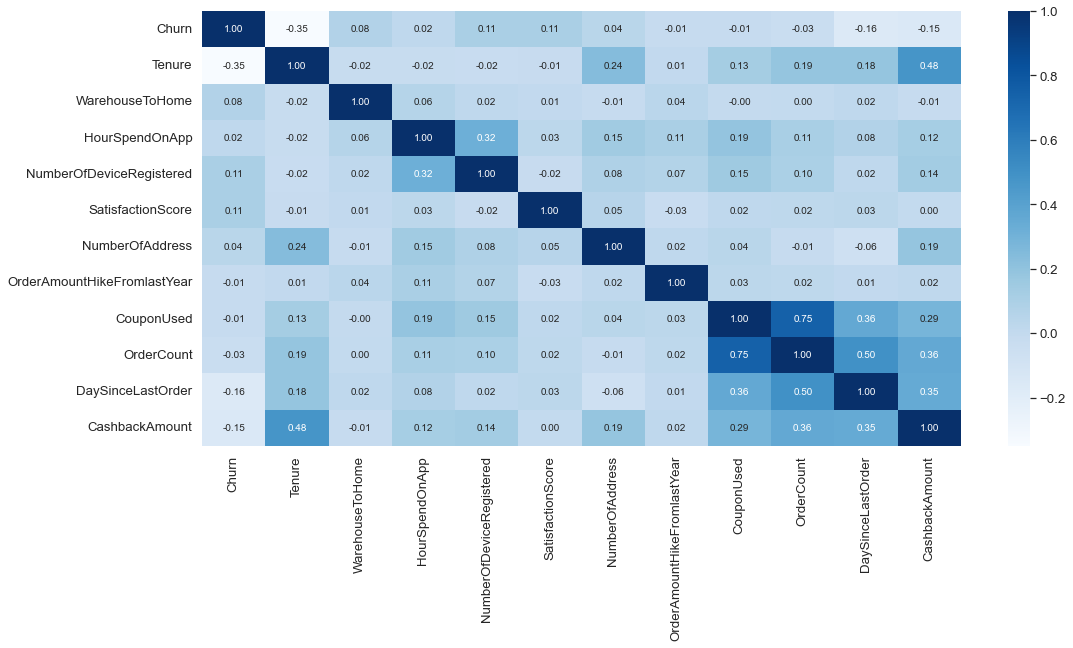

In [ ]:
#karena untuk memuncukan ke heatmap harus type data numeric, maka convert churn jadi numeric

df2 = df.copy()
df2['Churn'] = df2['Churn'].astype(int)
plt.figure(figsize=(17,8))                
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='Blues')


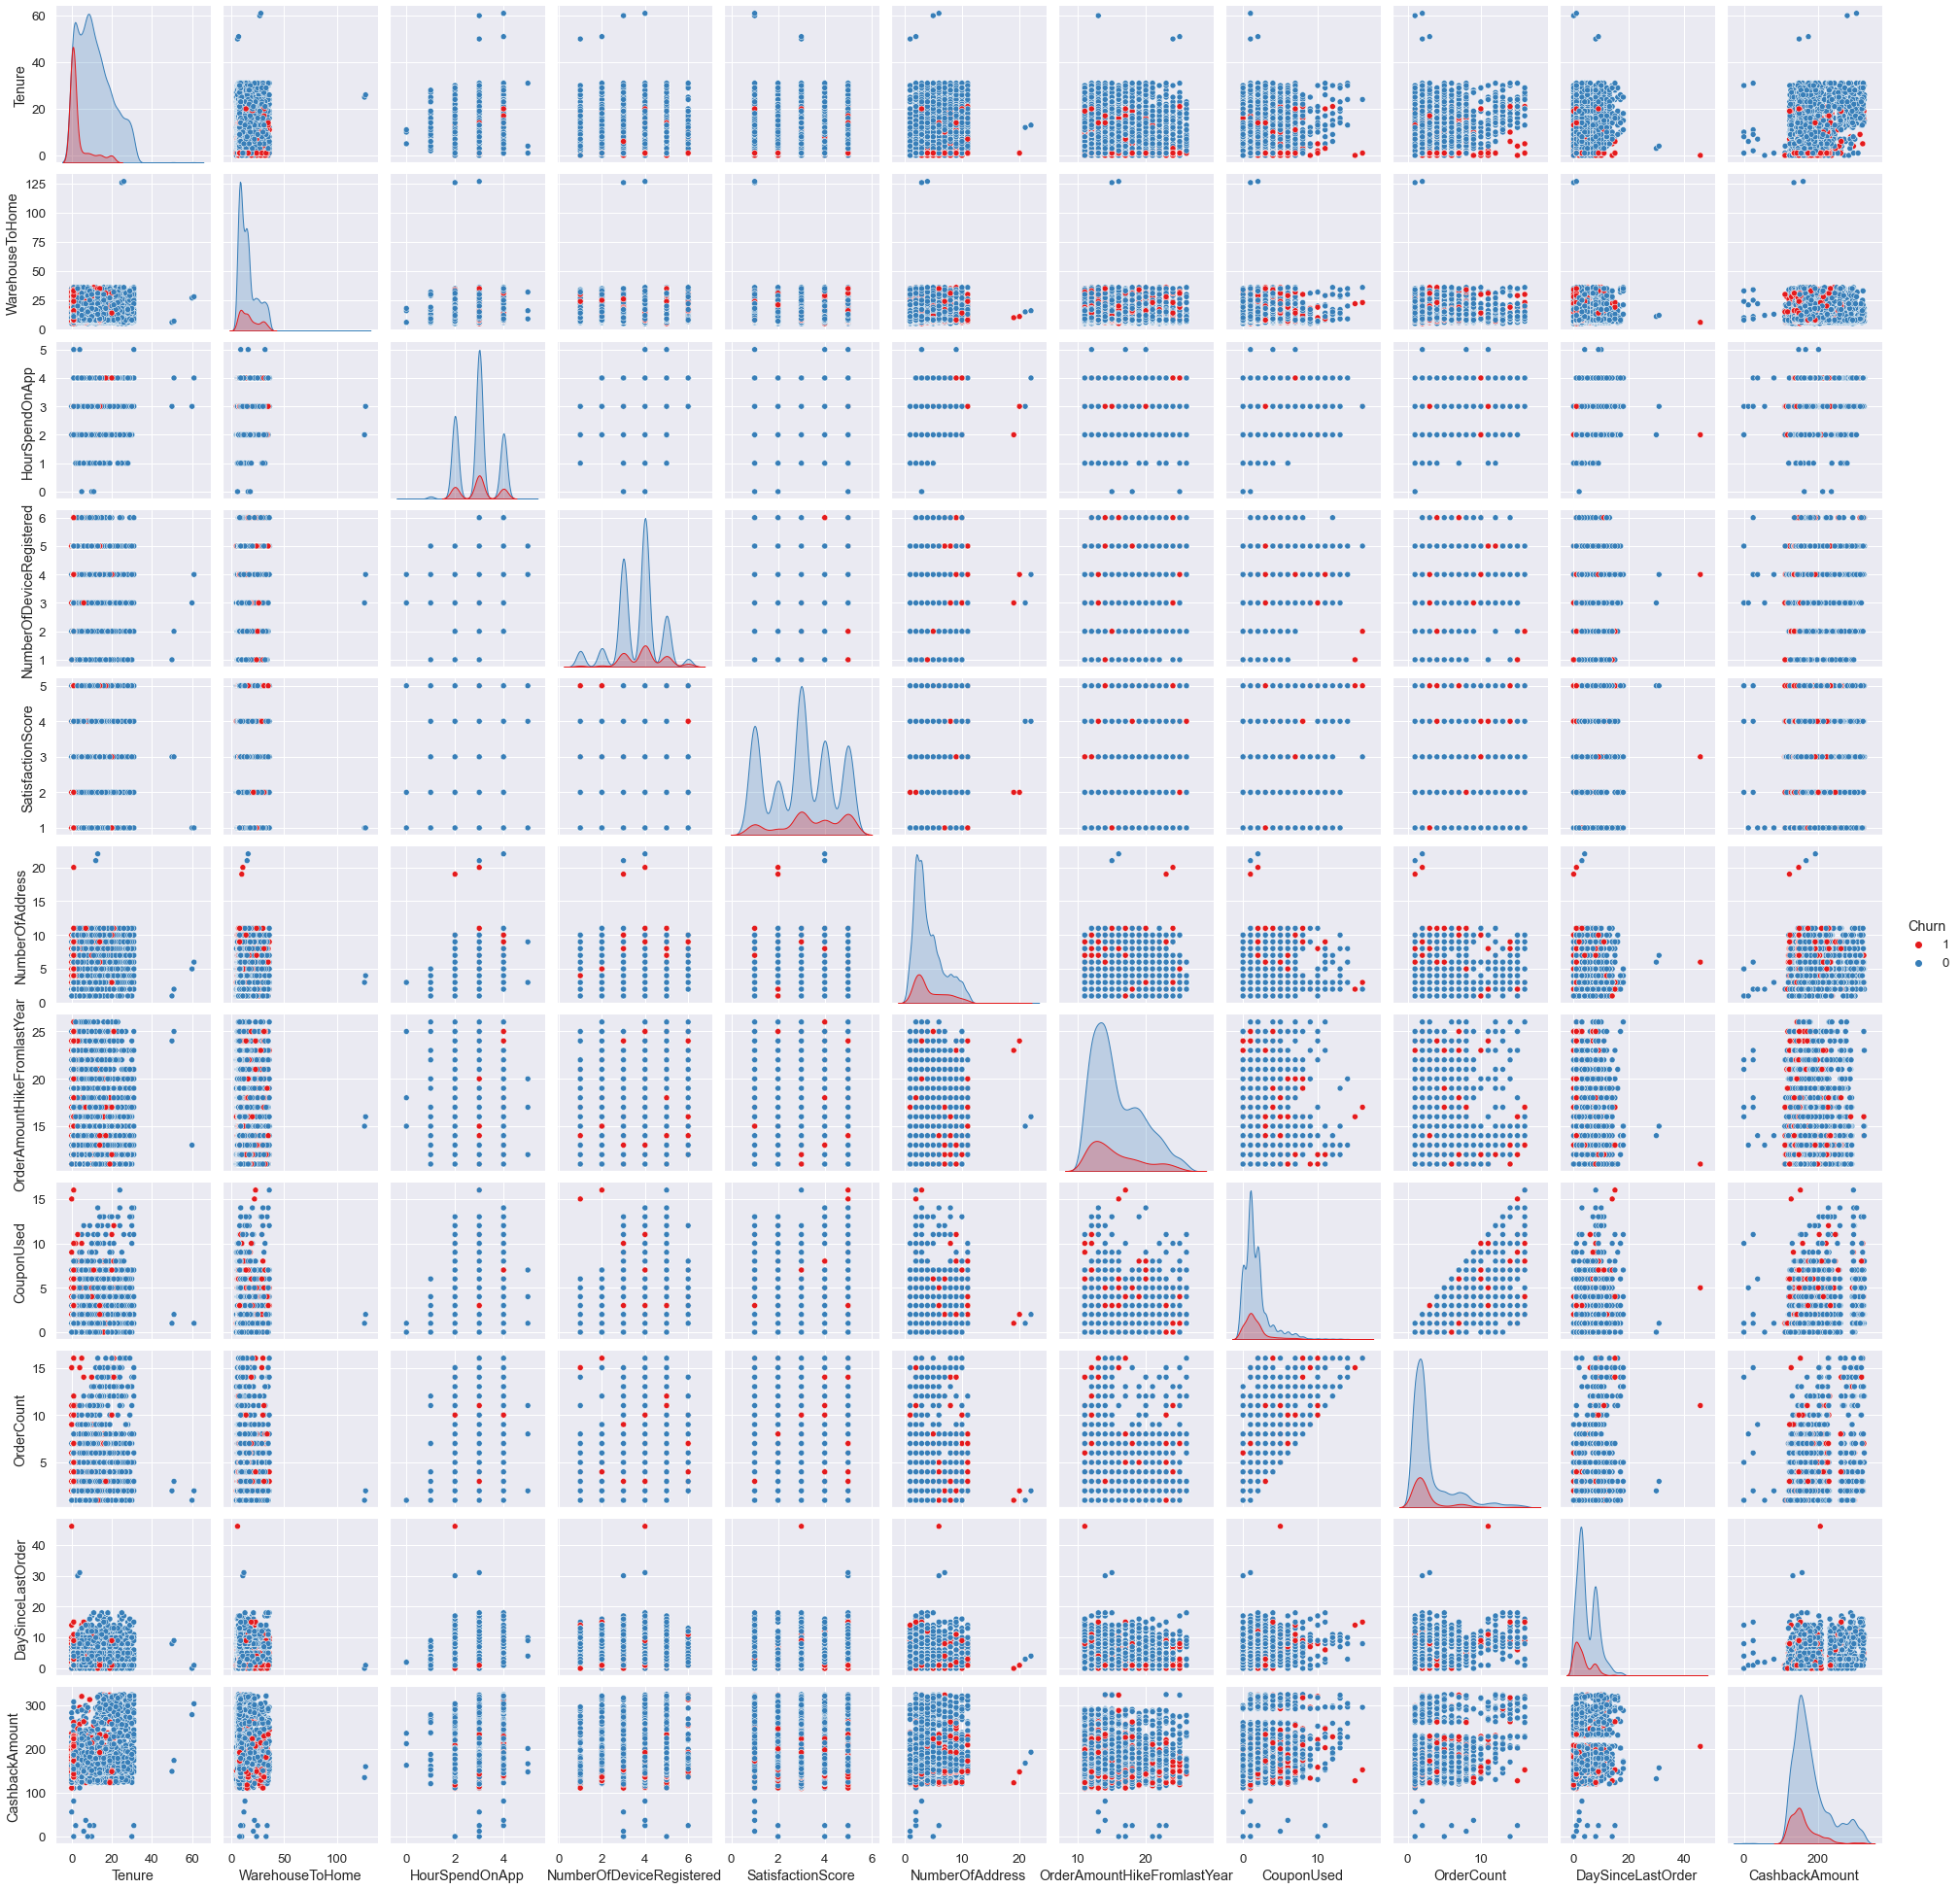

In [ ]:
sns.pairplot(df, hue='Churn')

Tidak ada scatter plot yang terlihat memisahkan 2 warna secara jelas